<h1>Machine learning - HW2</h1>
<h1>Navid Ashraf</h1>

<h2>Libraries:</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

<h2>Question 1</h2>
<p>We want to generate sample data such as slide images based on sin function; Then we are going to approximate it using regression method.</p>
<p>Solve the fitting(regression) problem for the simulated data ($t=sin2\pi x + \epsilon$, $0\leq x \leq 1$,$N=15$,$\epsilon \sim N(0,s^2)$ and present the results. Write the programs in a way that the sin function and its parameters can be easily changed.</p>
<p>The mean squared error(MSE) should be the criterion for error measurement. Investigate the effect of changes in "s" on the train and test error.</p>
<p>Considering the polynomial regression model of order m, illustrate the phenomena of overfitting and underfitting on a graph with respect to the number of samples(N).</p>
<p>The horizontal axis of this graph should represent the number of samples, and the vertical axis should represent the train and test errors.</p>
<p>Provide an analysis of your results.</p>

<h2>Answer</h2>

<h3>part one:</h3>
    <p>base case($N=15$, $s^2 = 0.1$):</p>

Train Mean squared error: 0.00
Test Mean squared error: 0.01


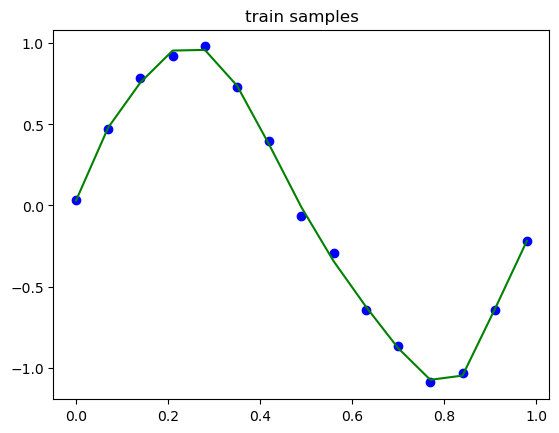

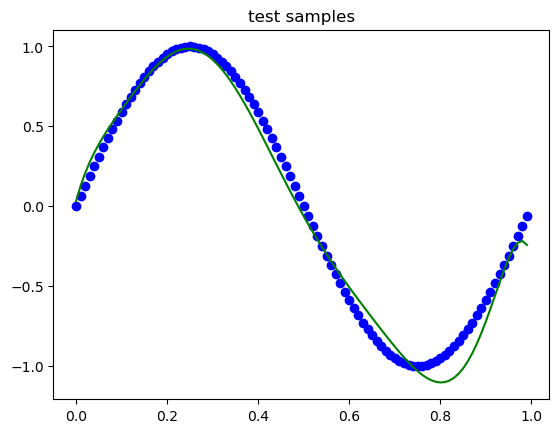

In [2]:
#Data Generation
def f(t):
    return np.sin(2*np.pi*t)

x1 = np.arange(0.0, 1.0, 0.07)
x2 = np.arange(0.0, 1.0, 0.01)
e = np.random.normal(0,.1,x1.shape[0])

y = f(x1) + e

#Build data matrix
def func(x, m):
    X = np.ones((x.shape[0],m+1))
    for i in range(m):
        X[:,i+1] = x**(i+1)
    return X

X1 = func(x1, 9)
X2 = func(x2, 9)

#Build  regression model
reg = linear_model.LinearRegression()
reg.fit(X1, y)
y1 = reg.predict(X1)
y2 = reg.predict(X2)

#Assess
print('Train Mean squared error: %.2f'
      % mean_squared_error(y, y1))
print('Test Mean squared error: %.2f'
      % mean_squared_error(f(x2), y2))
plt.plot(x1, y, 'bo', x1, y1, 'g')
plt.title("train samples")
plt.show()
plt.plot(x2, f(x2), 'bo', x2, y2, 'g')
plt.title("test samples")
plt.show()

<h3>part 2</h3>
Investigate the effect of changes in "s" on the train and test error:

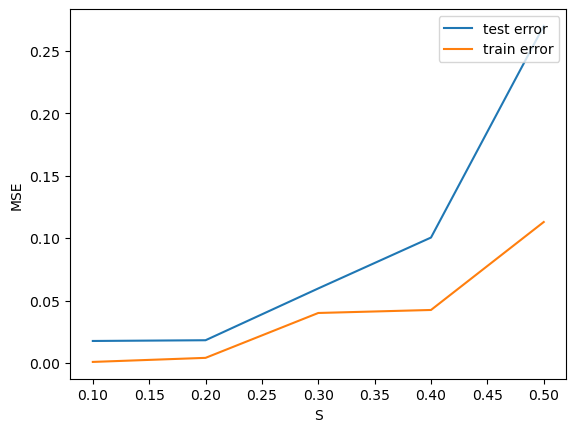

In [32]:
sx1 = np.arange(0.0, 1.0, 0.07)
sx2 = np.arange(0.0, 1.0, 0.01)
sNumbers = [0.1,0.2,0.3,0.4,0.5]

def calcSEffect(x1, x2, s):
    e = np.random.normal(0,s,x1.shape[0])
    y = f(x1) + e
    X1 = func(x1, 9)
    X2 = func(x2, 9)
    reg = linear_model.LinearRegression()
    reg.fit(X1, y)
    Y1 = reg.predict(X1)
    Y2 = reg.predict(X2)
    return mean_squared_error(y, Y1),mean_squared_error(f(x2), Y2)

sTrainError, sTestError = [] , []

# s = 0.1
a,b = calcSEffect(sx1,sx2,0.1)
sTrainError.append(a)
sTestError.append(b)

# s = 0.2
a,b = calcSEffect(sx1,sx2,0.2)
sTrainError.append(a)
sTestError.append(b)

# s = 0.3
a,b = calcSEffect(sx1,sx2,0.3)
sTrainError.append(a)
sTestError.append(b)

# s = 0.4
a,b = calcSEffect(sx1,sx2,0.4)
sTrainError.append(a)
sTestError.append(b)

# s = 0.5
a,b = calcSEffect(sx1,sx2,0.5)
sTrainError.append(a)
sTestError.append(b)

plt.plot(sNumbers,sTestError, label="test error")
plt.plot(sNumbers,sTrainError, label="train error")
plt.legend(loc='upper right')
plt.xlabel('S')
plt.ylabel('MSE')
plt.show()

we can see that increasing "s" lead to increased train and test error.

<h3>part 3</h3>
<p>illustrate the phenomena of overfitting and underfitting:<br>
We'll use a simple model(m=2) and a complex model(m=15)<br>
We'll use train data consisted of 9, 10, 11, 12, 13, 14(N=9, 10, 11, 12, 13, 14) samples.
<p>

In [149]:
#5 samples
x5Train = np.arange(0.0, 1.0, 0.2)
x5Test = np.arange(0.0, 1.0, 0.01)
e = np.random.normal(0,.1,x5Train.shape[0])

y5Train= f(x5Train) + e

#10 samples
x1Train = np.arange(0.0, 1.0, 0.1)
x1Test = np.arange(0.0, 1.0, 0.01)
e = np.random.normal(0,.1,x1Train.shape[0])

y1Train= f(x1Train) + e

#90 samples
x9Train = np.arange(0.0, 1.0, 0.0112)
x9Test = np.arange(0.0, 1.0, 0.01)
e = np.random.normal(0,.1,x9Train.shape[0])

y9Train= f(x9Train) + e

#100 samples
x10Train = np.arange(0.0, 1.0, 0.01)
x10Test = np.arange(0.0, 1.0, 0.01)
e = np.random.normal(0,.1,x10Train.shape[0])

y10Train= f(x10Train) + e

#110 samples
x11Train = np.arange(0.0, 1.0, 0.0091)
x11Test = np.arange(0.0, 1.0, 0.01)
e = np.random.normal(0,.1,x11Train.shape[0])

y11Train= f(x11Train) + e

#120 samples
x12Train = np.arange(0.0, 1.0, 0.00835)
x12Test = np.arange(0.0, 1.0, 0.01)
e = np.random.normal(0,.1,x12Train.shape[0])

y12Train= f(x12Train) + e

#130 samples
x13Train = np.arange(0.0, 1.0, 0.0077)
x13Test = np.arange(0.0, 1.0, 0.01)
e = np.random.normal(0,.1,x13Train.shape[0])

y13Train= f(x13Train) + e

#140 samples
x14Train = np.arange(0.0, 1.0, 0.00715)
x14Test = np.arange(0.0, 1.0, 0.01)
e = np.random.normal(0,.1,x14Train.shape[0])

y14Train= f(x14Train) + e

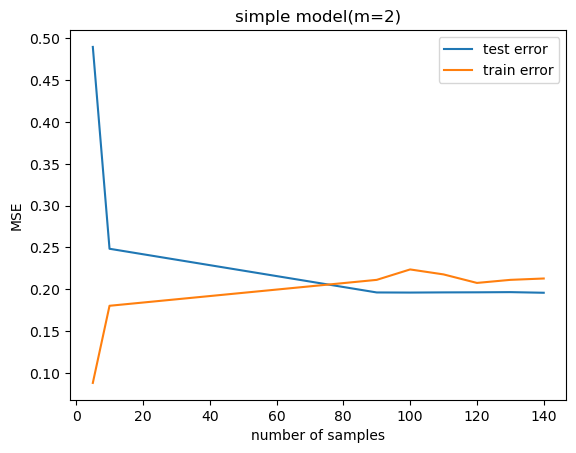

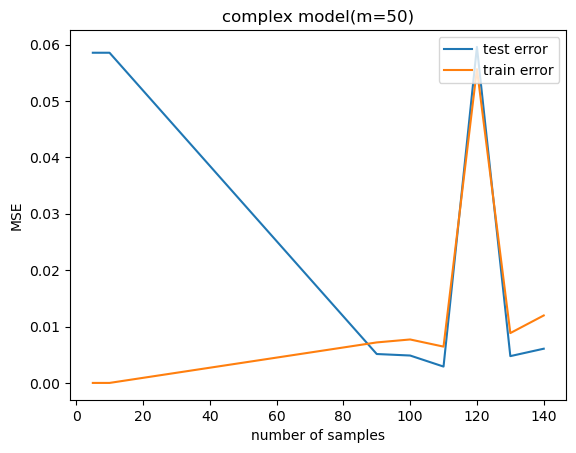

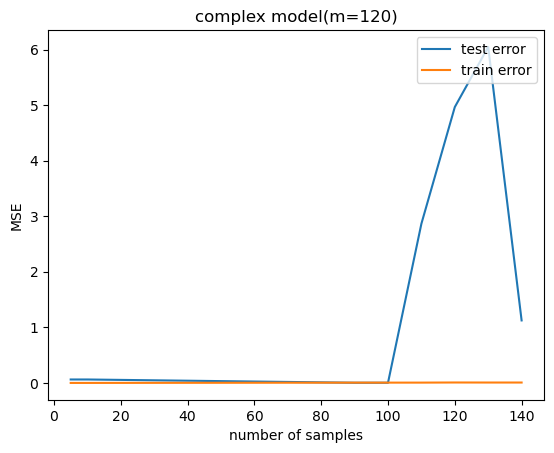

In [154]:
sampleNumbers = [5,10,90,100,110,120,130,140]
def CalcMSE(x1, x2, y1, m):
    X1 = func(x1, m)
    X2 = func(x2, m)
    reg = linear_model.LinearRegression()
    reg.fit(X1, y1)
    Y1 = reg.predict(X1)
    Y2 = reg.predict(X2)
    return mean_squared_error(y1, Y1),mean_squared_error(f(x2), Y2)

#simple model(m=2)
trainError, testError = [],[]

a,b = CalcMSE(x5Train, x5Test, y5Train, 2)
trainError.append(a)
testError.append(b)

a,b = CalcMSE(x1Train, x1Test, y1Train, 2)
trainError.append(a)
testError.append(b)

a,b = CalcMSE(x9Train, x9Test, y9Train, 2)
trainError.append(a)
testError.append(b)

a,b = CalcMSE(x10Train, x10Test, y10Train, 2)
trainError.append(a)
testError.append(b)

a,b = CalcMSE(x11Train, x11Test, y11Train, 2)
trainError.append(a)
testError.append(b)

a,b = CalcMSE(x12Train, x12Test, y12Train, 2)
trainError.append(a)
testError.append(b)

a,b = CalcMSE(x13Train, x13Test, y13Train, 2)
trainError.append(a)
testError.append(b)

a,b = CalcMSE(x14Train, x14Test, y14Train, 2)
trainError.append(a)
testError.append(b)

plt.plot(sampleNumbers,testError, label="test error")
plt.plot(sampleNumbers,trainError, label="train error")
plt.legend(loc='upper right')
plt.xlabel('number of samples')
plt.ylabel('MSE')
plt.title("simple model(m=2)")
plt.show()

#complex model(m=50)
trainError, testError = [],[]

a,b = CalcMSE(x5Train, x5Test, y5Train, 50)
trainError.append(a)
testError.append(b)

a,b = CalcMSE(x5Train, x5Test, y5Train, 50)
trainError.append(a)
testError.append(b)

a,b = CalcMSE(x9Train, x9Test, y9Train, 50)
trainError.append(a)
testError.append(b)

a,b = CalcMSE(x10Train, x10Test, y10Train, 50)
trainError.append(a)
testError.append(b)

a,b = CalcMSE(x11Train, x11Test, y11Train, 50)
trainError.append(a)
testError.append(b)

a,b = CalcMSE(x12Train, x12Test, y12Train, 50)
trainError.append(a)
testError.append(b)

a,b = CalcMSE(x13Train, x13Test, y13Train, 50)
trainError.append(a)
testError.append(b)

a,b = CalcMSE(x14Train, x14Test, y14Train, 50)
trainError.append(a)
testError.append(b)

plt.plot(sampleNumbers,testError, label="test error")
plt.plot(sampleNumbers,trainError, label="train error")
plt.legend(loc='upper right')
plt.xlabel('number of samples')
plt.ylabel('MSE')
plt.title("complex model(m=50)")
plt.show()

#complex model(m=120)
trainError, testError = [],[]

a,b = CalcMSE(x5Train, x5Test, y5Train, 120)
trainError.append(a)
testError.append(b)

a,b = CalcMSE(x5Train, x5Test, y5Train, 120)
trainError.append(a)
testError.append(b)

a,b = CalcMSE(x10Train, x10Test, y10Train, 120)
trainError.append(a)
testError.append(b)

a,b = CalcMSE(x10Train, x10Test, y10Train, 120)
trainError.append(a)
testError.append(b)

a,b = CalcMSE(x11Train, x11Test, y11Train, 120)
trainError.append(a)
testError.append(b)

a,b = CalcMSE(x12Train, x12Test, y12Train, 120)
trainError.append(a)
testError.append(b)

a,b = CalcMSE(x13Train, x13Test, y13Train, 120)
trainError.append(a)
testError.append(b)

a,b = CalcMSE(x14Train, x14Test, y14Train, 120)
trainError.append(a)
testError.append(b)

plt.plot(sampleNumbers,testError, label="test error")
plt.plot(sampleNumbers,trainError, label="train error")
plt.legend(loc='upper right')
plt.xlabel('number of samples')
plt.ylabel('MSE')
plt.title("complex model(m=120)")
plt.show()

As we can see:<br>
1- in simple model(m=2):
<ul>
    <li>for train set consisting of 5 samples, there is a huge gap between train and test error so we have <strong>over-fitting</strong>. lack of training data cause this.</li>
    <li>for train sets consisting of 10,90,100,110,120,130 and 140 samples, train and test errors are close. but we have a fairly high error. thats because of <strong>under-fitting</strong>.</li>
</ul>
2- in complex model(m=50):
<ul>
<li>for train sets consisting of 5 and 10 samples, train error is 0 so <strong>over-fitting</strong> happened here.</li>
<li>for train sets consisting of 90,100,110,120,130 and 140 samples, train and test errors are close and also we have a fairly low error. we can conclude that m=50 is a good choice for modeling.</li>
    </ul>
3- in complex model(m=120):
<ul>
    <li>train errors for all the training sets are 0, so choosing this model cause <strong>over-fitting</strong>.</li>
</ul>

<h2>Question 2</h2>
<p>Perform regression on the previous problem using Ridge adjustment for N=15. Compare outputs for different values of the adjustment parameter and m in a chart.</p>

<h2>Answer</h2>

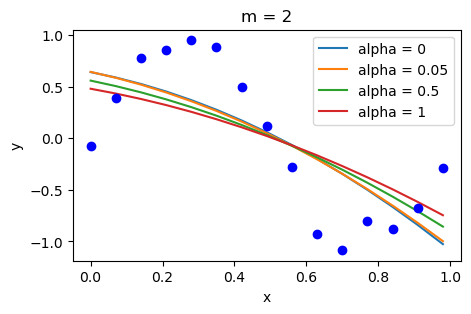

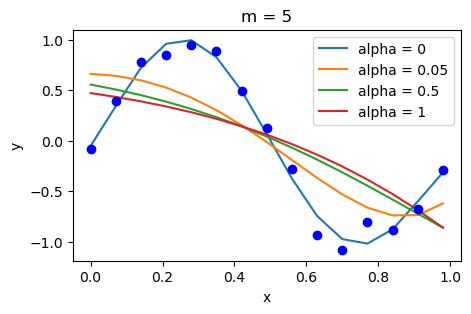

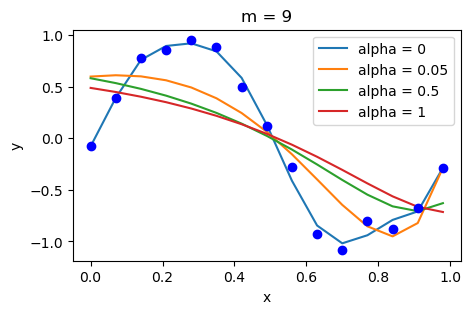

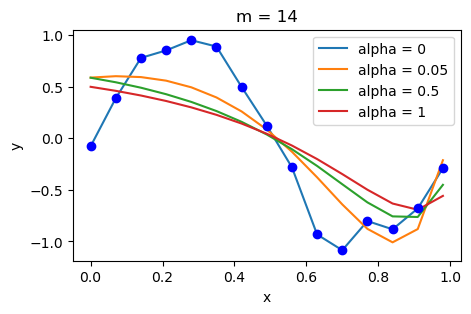

In [62]:
ridge_x1 = np.arange(0.0, 1.0, 0.07)
ridge_x2 = np.arange(0.0, 1.0, 0.01)
e = np.random.normal(0,.1,ridge_x1.shape[0])

ridge_y = f(ridge_x1) + e


##
## m = 2
##

plt.figure(figsize=(5,3))

#Build data matrix
ridge_X1 = func(ridge_x1, 2)
ridge_X2 = func(ridge_x2, 2)

#Build  regression model alpha = 0
reg = linear_model.Ridge(alpha=0)
reg.fit(ridge_X1, ridge_y)
ridge_y1 = reg.predict(ridge_X1)
ridge_y2 = reg.predict(ridge_X2)
plt.plot(ridge_x1,ridge_y1, label="alpha = 0")

#Build  regression model alpha = 0.05
reg = linear_model.Ridge(alpha=0.05)
reg.fit(ridge_X1, ridge_y)
ridge_y1 = reg.predict(ridge_X1)
ridge_y2 = reg.predict(ridge_X2)
plt.plot(ridge_x1,ridge_y1, label="alpha = 0.05")

#Build  regression model alpha = 0.5
reg = linear_model.Ridge(alpha=0.5)
reg.fit(ridge_X1, ridge_y)
ridge_y1 = reg.predict(ridge_X1)
ridge_y2 = reg.predict(ridge_X2)
plt.plot(ridge_x1,ridge_y1, label="alpha = 0.5")

#Build  regression model alpha = 1
reg = linear_model.Ridge(alpha=1)
reg.fit(ridge_X1, ridge_y)
ridge_y1 = reg.predict(ridge_X1)
ridge_y2 = reg.predict(ridge_X2)
plt.plot(ridge_x1,ridge_y1, label="alpha = 1")

plt.plot(ridge_x1, ridge_y, 'bo')
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title("m = 2")
plt.show()

##
## m = 5
##

plt.figure(figsize=(5,3))

#Build data matrix
ridge_X1 = func(ridge_x1, 5)
ridge_X2 = func(ridge_x2, 5)

#Build  regression model alpha = 0
reg = linear_model.Ridge(alpha=0)
reg.fit(ridge_X1, ridge_y)
ridge_y1 = reg.predict(ridge_X1)
ridge_y2 = reg.predict(ridge_X2)
plt.plot(ridge_x1,ridge_y1, label="alpha = 0")

#Build  regression model alpha = 0.05
reg = linear_model.Ridge(alpha=0.05)
reg.fit(ridge_X1, ridge_y)
ridge_y1 = reg.predict(ridge_X1)
ridge_y2 = reg.predict(ridge_X2)
plt.plot(ridge_x1,ridge_y1, label="alpha = 0.05")

#Build  regression model alpha = 0.5
reg = linear_model.Ridge(alpha=0.5)
reg.fit(ridge_X1, ridge_y)
ridge_y1 = reg.predict(ridge_X1)
ridge_y2 = reg.predict(ridge_X2)
plt.plot(ridge_x1,ridge_y1, label="alpha = 0.5")

#Build  regression model alpha = 1
reg = linear_model.Ridge(alpha=1)
reg.fit(ridge_X1, ridge_y)
ridge_y1 = reg.predict(ridge_X1)
ridge_y2 = reg.predict(ridge_X2)
plt.plot(ridge_x1,ridge_y1, label="alpha = 1")

plt.plot(ridge_x1, ridge_y, 'bo')
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title("m = 5")
plt.show()

##
## m = 9
##

plt.figure(figsize=(5,3))

#Build data matrix
ridge_X1 = func(ridge_x1, 9)
ridge_X2 = func(ridge_x2, 9)

#Build  regression model alpha = 0
reg = linear_model.Ridge(alpha=0)
reg.fit(ridge_X1, ridge_y)
ridge_y1 = reg.predict(ridge_X1)
ridge_y2 = reg.predict(ridge_X2)
plt.plot(ridge_x1,ridge_y1, label="alpha = 0")

#Build  regression model alpha = 0.05
reg = linear_model.Ridge(alpha=0.05)
reg.fit(ridge_X1, ridge_y)
ridge_y1 = reg.predict(ridge_X1)
ridge_y2 = reg.predict(ridge_X2)
plt.plot(ridge_x1,ridge_y1, label="alpha = 0.05")

#Build  regression model alpha = 0.5
reg = linear_model.Ridge(alpha=0.5)
reg.fit(ridge_X1, ridge_y)
ridge_y1 = reg.predict(ridge_X1)
ridge_y2 = reg.predict(ridge_X2)
plt.plot(ridge_x1,ridge_y1, label="alpha = 0.5")

#Build  regression model alpha = 1
reg = linear_model.Ridge(alpha=1)
reg.fit(ridge_X1, ridge_y)
ridge_y1 = reg.predict(ridge_X1)
ridge_y2 = reg.predict(ridge_X2)
plt.plot(ridge_x1,ridge_y1, label="alpha = 1")

plt.plot(ridge_x1, ridge_y, 'bo')
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title("m = 9")
plt.show()

##
## m = 14
##

plt.figure(figsize=(5,3))

#Build data matrix
ridge_X1 = func(ridge_x1, 14)
ridge_X2 = func(ridge_x2, 14)

#Build  regression model alpha = 0
reg = linear_model.Ridge(alpha=0)
reg.fit(ridge_X1, ridge_y)
ridge_y1 = reg.predict(ridge_X1)
ridge_y2 = reg.predict(ridge_X2)
plt.plot(ridge_x1,ridge_y1, label="alpha = 0")

#Build  regression model alpha = 0.05
reg = linear_model.Ridge(alpha=0.05)
reg.fit(ridge_X1, ridge_y)
ridge_y1 = reg.predict(ridge_X1)
ridge_y2 = reg.predict(ridge_X2)
plt.plot(ridge_x1,ridge_y1, label="alpha = 0.05")

#Build  regression model alpha = 0.5
reg = linear_model.Ridge(alpha=0.5)
reg.fit(ridge_X1, ridge_y)
ridge_y1 = reg.predict(ridge_X1)
ridge_y2 = reg.predict(ridge_X2)
plt.plot(ridge_x1,ridge_y1, label="alpha = 0.5")

#Build  regression model alpha = 1
reg = linear_model.Ridge(alpha=1)
reg.fit(ridge_X1, ridge_y)
ridge_y1 = reg.predict(ridge_X1)
ridge_y2 = reg.predict(ridge_X2)
plt.plot(ridge_x1,ridge_y1, label="alpha = 1")

plt.plot(ridge_x1, ridge_y, 'bo')
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title("m = 14")
plt.show()


<h2>Question 3</h2>
<p>Perform a multivariate regression on real estate or stock data, or one of the reputable datasets at the following addresses, and present the results in a report. Try to make your answer contain at least one innovative and distinctive point.</p>
<p>http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html</p>
<p>https://archive.ics.uci.edu/ml/datasets/Stock+portfolio+performance</p>
<p>https://archive.ics.uci.edu/ml/datasets.html</p>

<h2>Answer</h2>

In [63]:
import pandas as pd

In [78]:
path = ('stockPortfolioPerformanceDataSet.xlsx')
xl = pd.ExcelFile(path)
df1 = xl.parse('1st period')
df2 = xl.parse('2nd period')
df3 = xl.parse('3rd period')
df4 = xl.parse('4th period')
df5 = xl.parse('all period')

In [175]:
stockFeatures = ['the weight of the stock-picking concept','Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6']
yFeatures = ['the original investment performance indicator','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12']

#first period data
stock1x = df1[stockFeatures][1:64]
stock1y = df1[yFeatures][1:64]

#second period data
stock2x = df2[stockFeatures][1:64]
stock2y = df2[yFeatures][1:64]

#third period data
stock3x = df3[stockFeatures][1:64]
stock3y = df3[yFeatures][1:64]

#fourth period data
stock4x = df4[stockFeatures][1:64]
stock4y = df4[yFeatures][1:64]

#all period data
stock5x = df5[stockFeatures][1:64]
stock5y = df5[yFeatures][1:64]

now we can train our model based on each period to find out which period gives the best model for any of the targeted ys.

In [205]:
#predict Annual Return
def AnnualError(x1,y1,x2,y2,x3,y3,x4,y4,x5,y5):
    reg = linear_model.LinearRegression()
    reg.fit(x1, y1['the original investment performance indicator'])
    Y2 = reg.predict(x2)
    Y3 = reg.predict(x3)
    Y4 = reg.predict(x4)
    Y5 = reg.predict(x5)
    return (mean_squared_error(y2['the original investment performance indicator'], Y2) + 
mean_squared_error(y3['the original investment performance indicator'], Y3) +
mean_squared_error(y4['the original investment performance indicator'], Y4) +
mean_squared_error(y5['the original investment performance indicator'], Y5))/4

print("first period MSE for Annual Return: ", AnnualError(stock1x, stock1y, stock2x, stock2y,
                                                          stock3x, stock3y, stock4x, stock4y, stock5x, stock5y))
print("second period MSE for Annual Return: ", AnnualError(stock2x, stock2y, stock1x, stock1y,
                                                          stock3x, stock3y, stock4x, stock4y, stock5x, stock5y))
print("third period MSE for Annual Return: ", AnnualError(stock3x, stock3y, stock1x, stock1y,
                                                          stock2x, stock2y, stock4x, stock4y, stock5x, stock5y))
print("fourth period MSE for Annual Return: ", AnnualError(stock4x, stock4y, stock1x, stock1y,
                                                          stock2x, stock2y, stock3x, stock3y, stock5x, stock5y))
print("all time period MSE for Annual Return: ", AnnualError(stock5x, stock5y, stock1x, stock1y,
                                                          stock2x, stock2y, stock3x, stock3y, stock4x, stock4y))

first period MSE for Annual Return:  0.015741362546970377
second period MSE for Annual Return:  0.009636658763583566
third period MSE for Annual Return:  0.012150832321631902
fourth period MSE for Annual Return:  0.022990218816289616
all time period MSE for Annual Return:  0.007105226196658676


In [206]:
#predict Excess Return
def AnnualError(x1,y1,x2,y2,x3,y3,x4,y4,x5,y5):
    reg = linear_model.LinearRegression()
    reg.fit(x1, y1['Unnamed: 8'])
    Y2 = reg.predict(x2)
    Y3 = reg.predict(x3)
    Y4 = reg.predict(x4)
    Y5 = reg.predict(x5)
    return (mean_squared_error(y2['Unnamed: 8'], Y2) + 
mean_squared_error(y3['Unnamed: 8'], Y3) +
mean_squared_error(y4['Unnamed: 8'], Y4) +
mean_squared_error(y5['Unnamed: 8'], Y5))/4

print("first period MSE for Excess Return: ", AnnualError(stock1x, stock1y, stock2x, stock2y,
                                                          stock3x, stock3y, stock4x, stock4y, stock5x, stock5y))
print("second period MSE for Excess Return: ", AnnualError(stock2x, stock2y, stock1x, stock1y,
                                                          stock3x, stock3y, stock4x, stock4y, stock5x, stock5y))
print("third period MSE for Excess Return: ", AnnualError(stock3x, stock3y, stock1x, stock1y,
                                                          stock2x, stock2y, stock4x, stock4y, stock5x, stock5y))
print("fourth period MSE for Excess Return: ", AnnualError(stock4x, stock4y, stock1x, stock1y,
                                                          stock2x, stock2y, stock3x, stock3y, stock5x, stock5y))
print("all time period MSE for Excess Return: ", AnnualError(stock5x, stock5y, stock1x, stock1y,
                                                          stock2x, stock2y, stock3x, stock3y, stock4x, stock4y))

first period MSE for Excess Return:  0.000652001132020518
second period MSE for Excess Return:  0.0017294214029635112
third period MSE for Excess Return:  0.002426800954969616
fourth period MSE for Excess Return:  0.0006975064523405519
all time period MSE for Excess Return:  0.0006392303463215375


In [207]:
#predict Systematic Risk
def AnnualError(x1,y1,x2,y2,x3,y3,x4,y4,x5,y5):
    reg = linear_model.LinearRegression()
    reg.fit(x1, y1['Unnamed: 9'])
    Y2 = reg.predict(x2)
    Y3 = reg.predict(x3)
    Y4 = reg.predict(x4)
    Y5 = reg.predict(x5)
    return (mean_squared_error(y2['Unnamed: 9'], Y2) + 
mean_squared_error(y3['Unnamed: 9'], Y3) +
mean_squared_error(y4['Unnamed: 9'], Y4) +
mean_squared_error(y5['Unnamed: 9'], Y5))/4

print("first period MSE for Systematic Risk: ", AnnualError(stock1x, stock1y, stock2x, stock2y,
                                                          stock3x, stock3y, stock4x, stock4y, stock5x, stock5y))
print("second period MSE for Systematic Risk: ", AnnualError(stock2x, stock2y, stock1x, stock1y,
                                                          stock3x, stock3y, stock4x, stock4y, stock5x, stock5y))
print("third period MSE for Systematic Risk: ", AnnualError(stock3x, stock3y, stock1x, stock1y,
                                                          stock2x, stock2y, stock4x, stock4y, stock5x, stock5y))
print("fourth period MSE for Systematic Risk: ", AnnualError(stock4x, stock4y, stock1x, stock1y,
                                                          stock2x, stock2y, stock3x, stock3y, stock5x, stock5y))
print("all time period MSE for Systematic Risk: ", AnnualError(stock5x, stock5y, stock1x, stock1y,
                                                          stock2x, stock2y, stock3x, stock3y, stock4x, stock4y))


first period MSE for Systematic Risk:  0.06516748690385718
second period MSE for Systematic Risk:  0.07604019277260124
third period MSE for Systematic Risk:  0.05857252117226784
fourth period MSE for Systematic Risk:  0.11975329171209334
all time period MSE for Systematic Risk:  0.04548700961007318


In [201]:
#predict Total Risk
def AnnualError(x1,y1,x2,y2,x3,y3,x4,y4,x5,y5):
    reg = linear_model.LinearRegression()
    reg.fit(x1, y1['Unnamed: 10'])
    Y2 = reg.predict(x2)
    Y3 = reg.predict(x3)
    Y4 = reg.predict(x4)
    Y5 = reg.predict(x5)
    return (mean_squared_error(y2['Unnamed: 10'], Y2) + 
mean_squared_error(y3['Unnamed: 10'], Y3) +
mean_squared_error(y4['Unnamed: 10'], Y4) +
mean_squared_error(y5['Unnamed: 10'], Y5))/4

print("first period MSE for Total Risk: ", AnnualError(stock1x, stock1y, stock2x, stock2y,
                                                          stock3x, stock3y, stock4x, stock4y, stock5x, stock5y))
print("second period MSE for Total Risk: ", AnnualError(stock2x, stock2y, stock1x, stock1y,
                                                          stock3x, stock3y, stock4x, stock4y, stock5x, stock5y))
print("third period MSE for Total Risk: ", AnnualError(stock3x, stock3y, stock1x, stock1y,
                                                          stock2x, stock2y, stock4x, stock4y, stock5x, stock5y))
print("fourth period MSE for Total Risk: ", AnnualError(stock4x, stock4y, stock1x, stock1y,
                                                          stock2x, stock2y, stock3x, stock3y, stock5x, stock5y))
print("all time period MSE for Total Risk: ", AnnualError(stock5x, stock5y, stock1x, stock1y,
                                                          stock2x, stock2y, stock3x, stock3y, stock4x, stock4y))

first period MSE for Total Risk:  0.002438527680770097
second period MSE for Total Risk:  0.000950637678931997
third period MSE for Total Risk:  0.001200807675257774
fourth period MSE for Total Risk:  0.001864844891176049
all time period MSE for Total Risk:  0.0007951090326634979


In [202]:
#predict Abs. Win Rate
def AnnualError(x1,y1,x2,y2,x3,y3,x4,y4,x5,y5):
    reg = linear_model.LinearRegression()
    reg.fit(x1, y1['Unnamed: 11'])
    Y2 = reg.predict(x2)
    Y3 = reg.predict(x3)
    Y4 = reg.predict(x4)
    Y5 = reg.predict(x5)
    return (mean_squared_error(y2['Unnamed: 11'], Y2) + 
mean_squared_error(y3['Unnamed: 11'], Y3) +
mean_squared_error(y4['Unnamed: 11'], Y4) +
mean_squared_error(y5['Unnamed: 11'], Y5))/4

print("first period MSE for Abs. Win Rate: ", AnnualError(stock1x, stock1y, stock2x, stock2y,
                                                          stock3x, stock3y, stock4x, stock4y, stock5x, stock5y))
print("second period MSE for Abs. Win Rate: ", AnnualError(stock2x, stock2y, stock1x, stock1y,
                                                          stock3x, stock3y, stock4x, stock4y, stock5x, stock5y))
print("third period MSE for Abs. Win Rate: ", AnnualError(stock3x, stock3y, stock1x, stock1y,
                                                          stock2x, stock2y, stock4x, stock4y, stock5x, stock5y))
print("fourth period MSE for Abs. Win Rate: ", AnnualError(stock4x, stock4y, stock1x, stock1y,
                                                          stock2x, stock2y, stock3x, stock3y, stock5x, stock5y))
print("all time period MSE for Abs. Win Rate: ", AnnualError(stock5x, stock5y, stock1x, stock1y,
                                                          stock2x, stock2y, stock3x, stock3y, stock4x, stock4y))

first period MSE for Abs. Win Rate:  0.02660566494221591
second period MSE for Abs. Win Rate:  0.01337023888592215
third period MSE for Abs. Win Rate:  0.011026935775230076
fourth period MSE for Abs. Win Rate:  0.022190427190914727
all time period MSE for Abs. Win Rate:  0.009739507305555183


In [204]:
#predict Rel. Win Rate
def AnnualError(x1,y1,x2,y2,x3,y3,x4,y4,x5,y5):
    reg = linear_model.LinearRegression()
    reg.fit(x1, y1['Unnamed: 12'])
    Y2 = reg.predict(x2)
    Y3 = reg.predict(x3)
    Y4 = reg.predict(x4)
    Y5 = reg.predict(x5)
    return (mean_squared_error(y2['Unnamed: 12'], Y2) + 
mean_squared_error(y3['Unnamed: 12'], Y3) +
mean_squared_error(y4['Unnamed: 12'], Y4) +
mean_squared_error(y5['Unnamed: 12'], Y5))/4

print("first period MSE for Rel. Win Rate: ", AnnualError(stock1x, stock1y, stock2x, stock2y,
                                                          stock3x, stock3y, stock4x, stock4y, stock5x, stock5y))
print("second period MSE for Rel. Win Rate: ", AnnualError(stock2x, stock2y, stock1x, stock1y,
                                                          stock3x, stock3y, stock4x, stock4y, stock5x, stock5y))
print("third period MSE for Rel. Win Rate: ", AnnualError(stock3x, stock3y, stock1x, stock1y,
                                                          stock2x, stock2y, stock4x, stock4y, stock5x, stock5y))
print("fourth period MSE for Rel. Win Rate: ", AnnualError(stock4x, stock4y, stock1x, stock1y,
                                                          stock2x, stock2y, stock3x, stock3y, stock5x, stock5y))
print("all time period MSE for Rel. Win Rate: ", AnnualError(stock5x, stock5y, stock1x, stock1y,
                                                          stock2x, stock2y, stock3x, stock3y, stock4x, stock4y))

first period MSE for Rel. Win Rate:  0.03333630282719477
second period MSE for Rel. Win Rate:  0.10009688101045938
third period MSE for Rel. Win Rate:  0.09020954289387913
fourth period MSE for Rel. Win Rate:  0.03213835704764967
all time period MSE for Rel. Win Rate:  0.03089202507786557


<h3>result</h3>
we can sort periods based on their error for each target:
<ul>
    <li><strong>Annual Return: </strong>all time period, second period, third period, first period, fourth period</li>
    <li><strong>Excess Return: </strong>all time period, first period, fourth period, second period, third period</li>
    <li><strong>Systematic Risk: </strong>all time period, third period, first period, second period, fourth period</li>
    <li><strong>Total Risk: </strong>all time period, second period, third period, fourth period, first period</li>
    <li><strong>Abs. Win Rate: </strong>all time period, third period, second period, fourth period, first period</li>
    <li><strong>Rel. Win Rate: </strong>all time period, fourth period, first period, third period, second period</li>
</ul>

Our observations show that all-time period gives the best result for all targets. However, other periods work better for some targets and worse for others. If we don't have access to data from all-time period, it's better to choose the target in advance before choosing the period to train our model.